# Linear Regression with Multi-Dimensional Inputs

Linear Basis Function Models allow us to create linear models with more complex features. We can use known functions like polynomials, trigonometric functions, or even more complex functions to transform our input data into a higher-dimensional space. This allows us to model more complex relationships between the input and output variables.

**What does this look like when our data is already multi-dimensional?**

To visualize this, we will use the California Housing Dataset for regression. This dataset has 8 features and a target variable. Since we cannot visualize 9 dimensions, we will first determine the two most important features using a correlation matrix. We will then use these two features to create a linear regression model.

<Axes: title={'center': 'Pearson Correlation of Features'}>

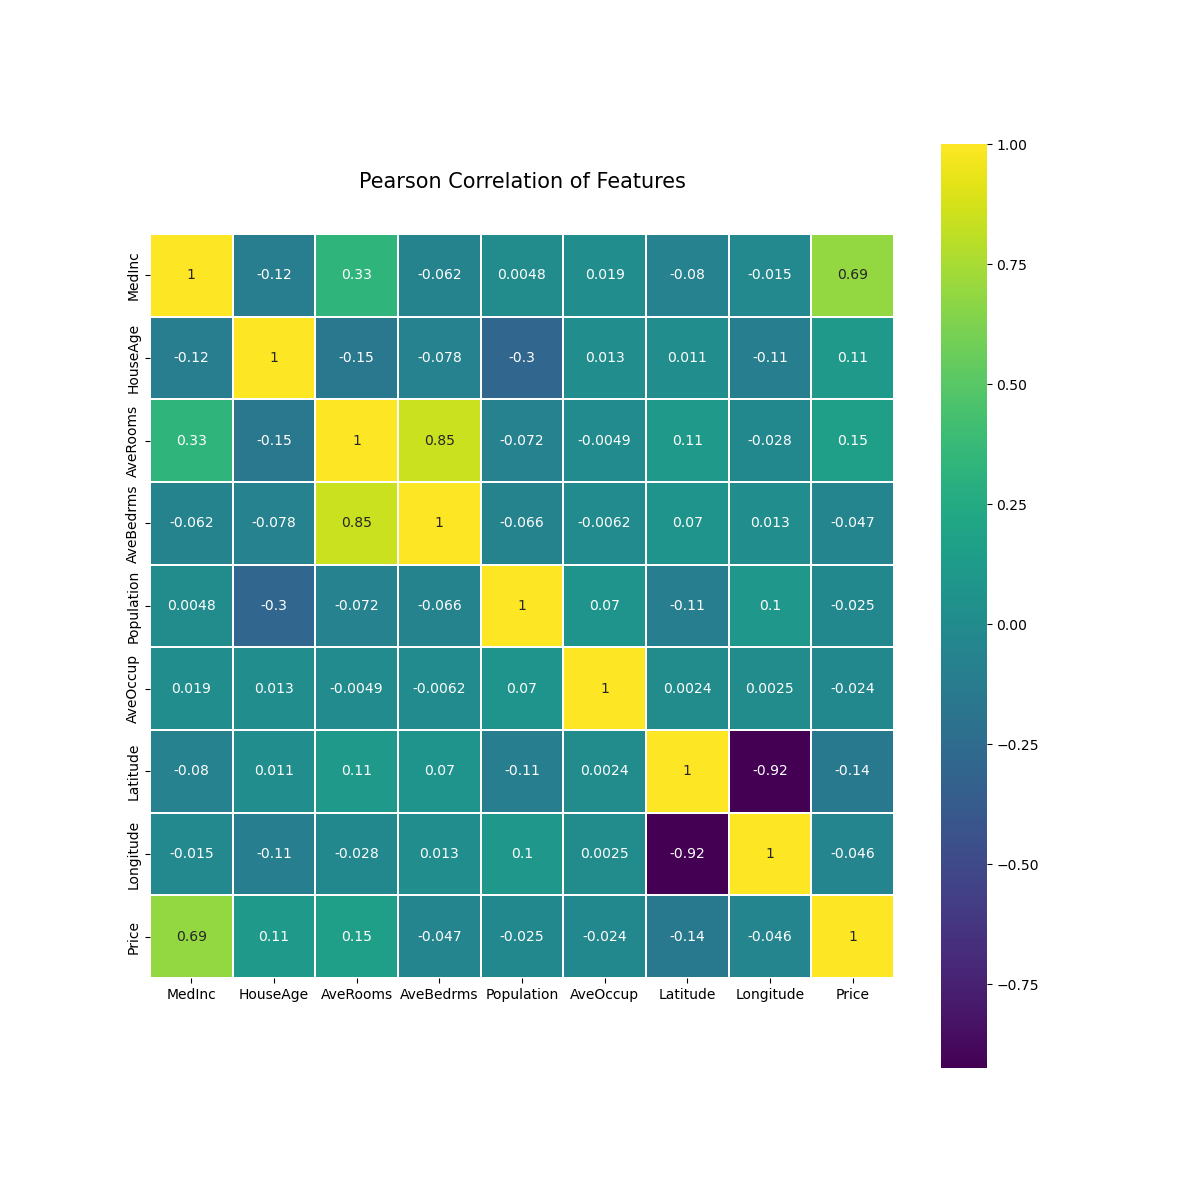

In [1]:
%matplotlib ipympl

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing(as_frame=True)
X = dataset.data
y = dataset.target

# Combine the features and the target into a single DataFrame
df = X.copy()
df['Price'] = y

# Perform correlation analysis to determine two features with the highest correlation with the price
correlation = np.corrcoef(X.T, y)

# Visulize the correlation matrix and label the features and values
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)


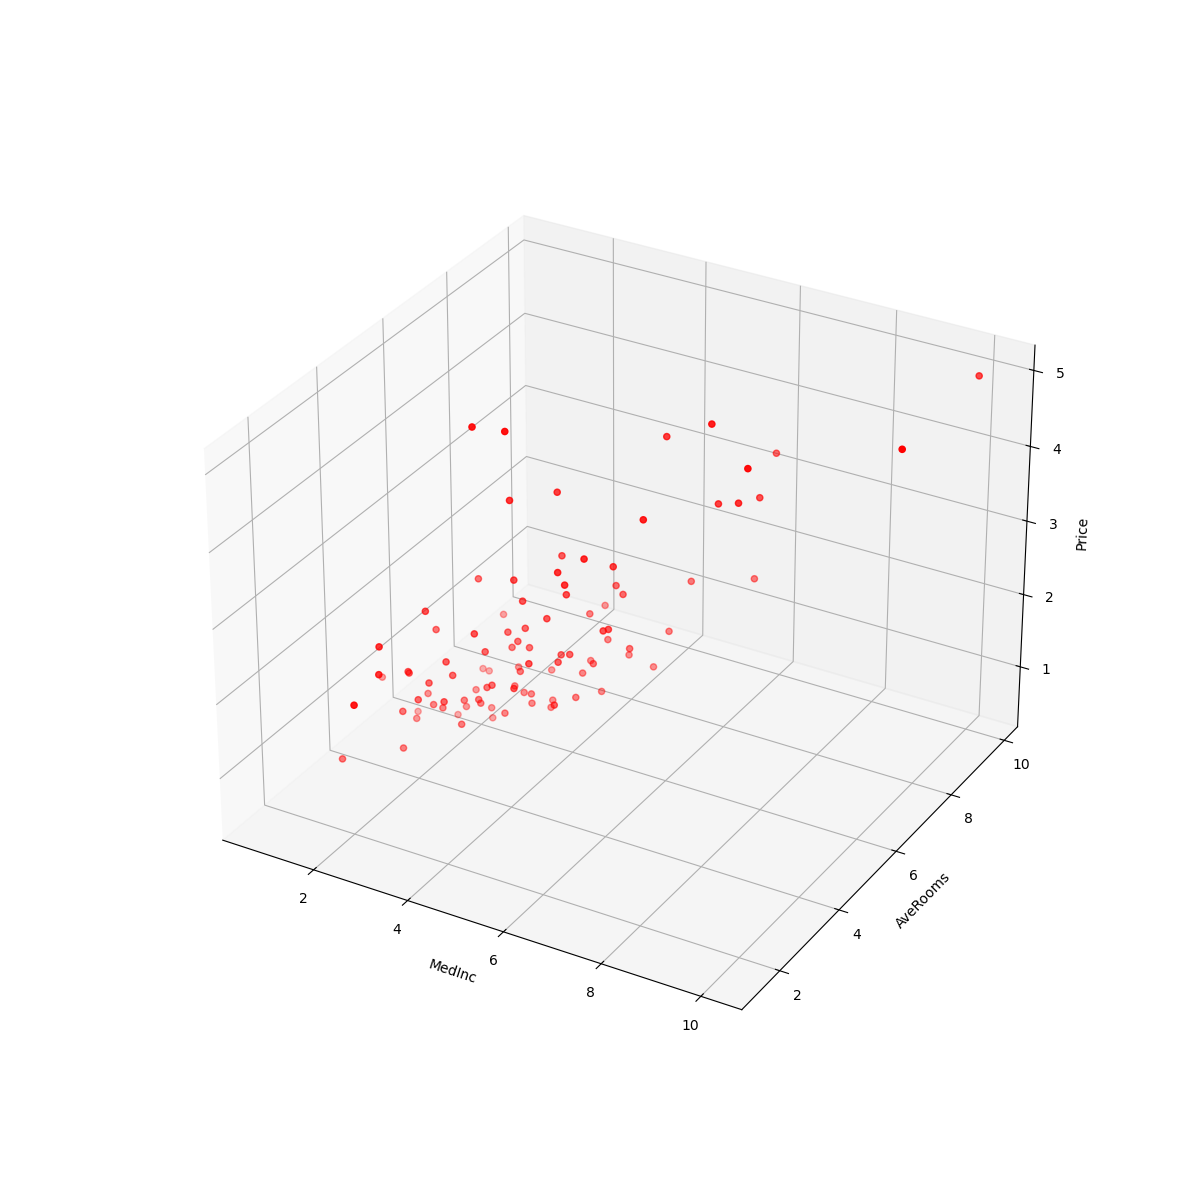

In [4]:
# Select the two features with the highest correlation with the price
feature1 = 'MedInc'
feature2 = 'AveRooms'

# To make visualization simpler, let's filter out any entries where the number of rooms is greater than 10 and select 100 samples
df = df[df['AveRooms'] < 10].sample(100)

# Plot the two features against the price (3d plot)
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[feature1], df[feature2], df['Price'], c='r', marker='o')
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel('Price')
plt.show()


Now that we have a small group of data, let's fit a linear model to it and visualize the plane.

/home/alex/anaconda3/envs/cse6363/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


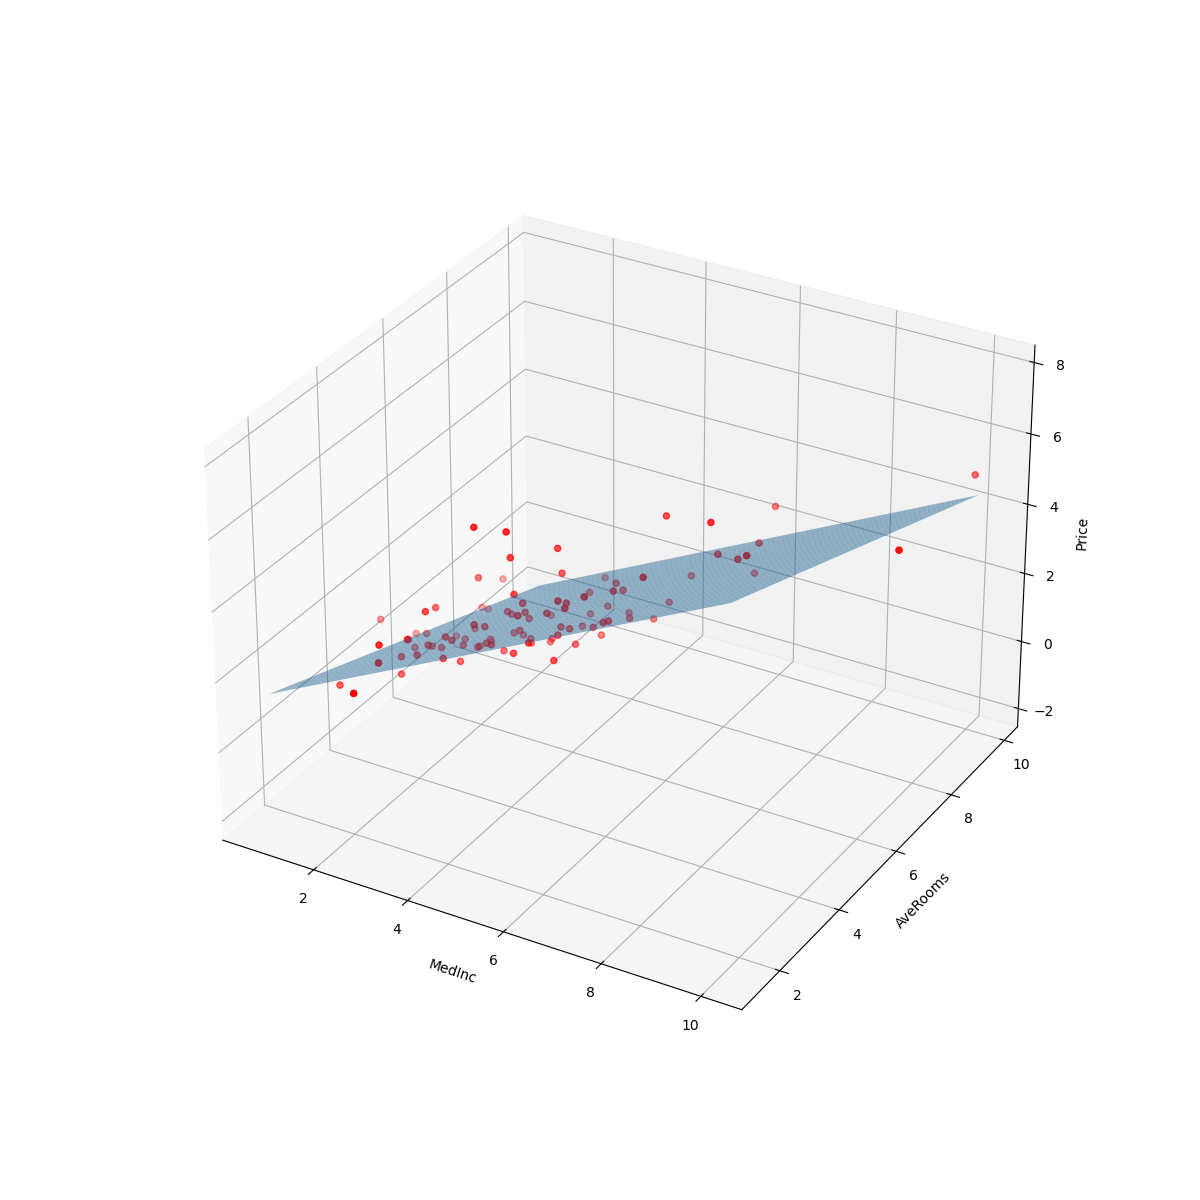

In [9]:
# Fit a linear model to the data
from sklearn.linear_model import LinearRegression

X = df[[feature1, feature2]]
y = df['Price']

model = LinearRegression()
model.fit(X, y)

# Visualize the model
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[feature1], df[feature2], df['Price'], c='r', marker='o')
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel('Price')

# Create a meshgrid of all the values for the two features
x = np.linspace(df[feature1].min(), df[feature1].max(), 100)
y = np.linspace(df[feature2].min(), df[feature2].max(), 100)
x, y = np.meshgrid(x, y)
z = model.predict(np.c_[x.ravel(), y.ravel()])
z = z.reshape(x.shape)

# Plot the surface
ax.plot_surface(x, y, z, alpha=0.5)
plt.show()

/home/alex/anaconda3/envs/cse6363/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


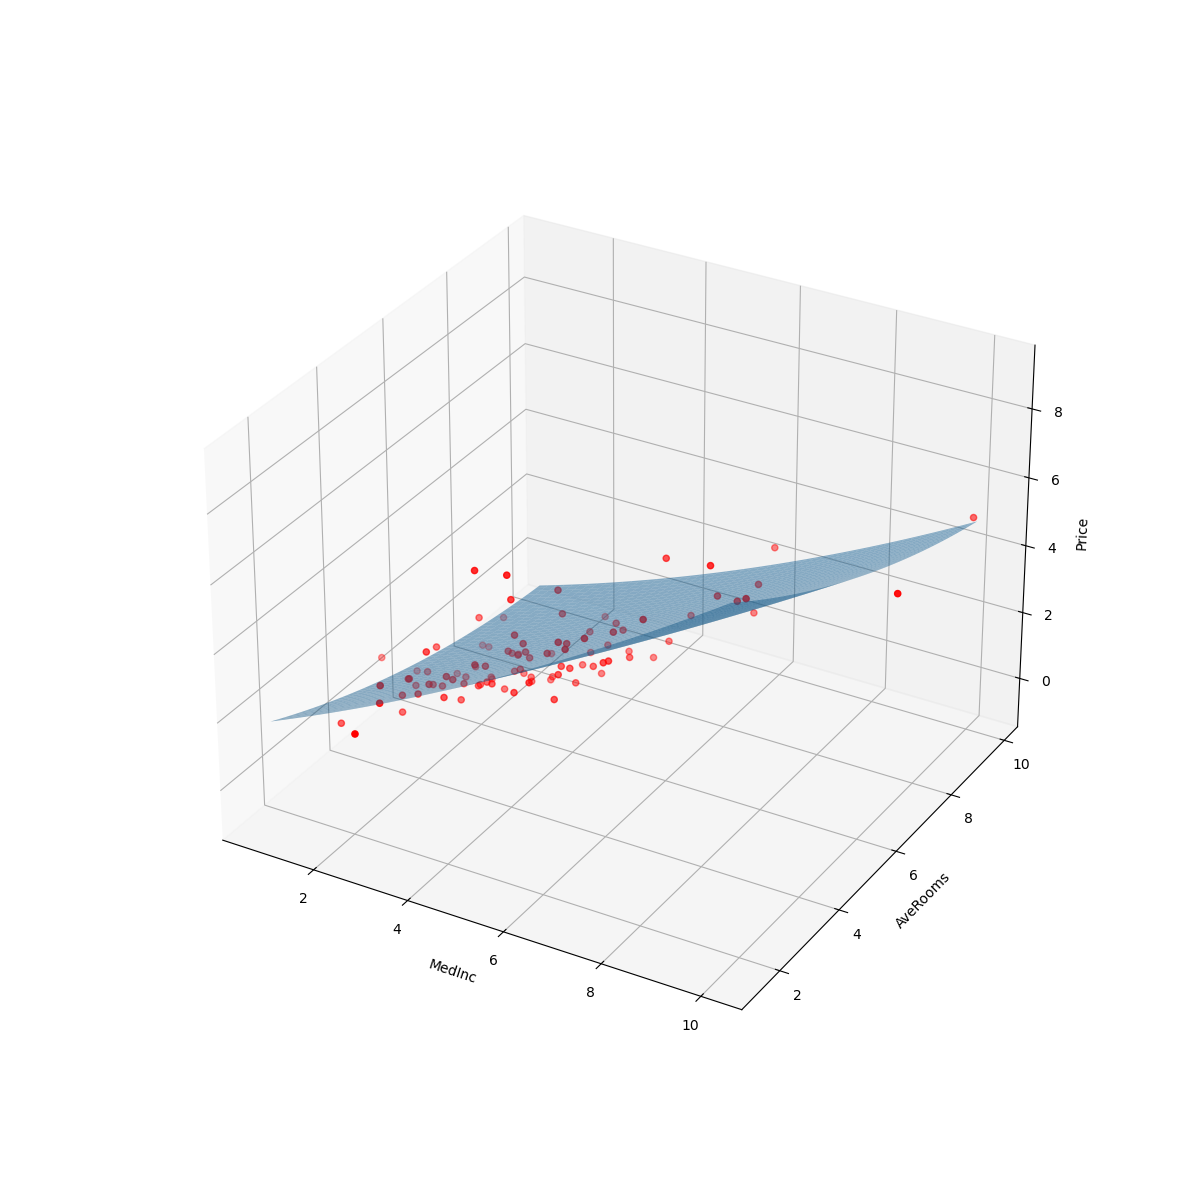

In [10]:
# Create a linear basis function model using a 2nd degree polynomial
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

X = df[[feature1, feature2]]
y = df['Price']

model = make_pipeline(PolynomialFeatures(2), LinearRegression())
model.fit(X, y)

# Visualize the model
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[feature1], df[feature2], df['Price'], c='r', marker='o')
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel('Price')

# Visualize the polynomial surface
x = np.linspace(df[feature1].min(), df[feature1].max(), 100)
y = np.linspace(df[feature2].min(), df[feature2].max(), 100)
x, y = np.meshgrid(x, y)
z = model.predict(np.c_[x.ravel(), y.ravel()])
z = z.reshape(x.shape)

ax.plot_surface(x, y, z, alpha=0.5)
plt.show()